# Convolution Animation

## For the two defined functions, compute $𝑓_1\star 𝑓_2$  and  $𝑓_2\star 𝑓_1$ 
## Store in animation_topic5_1a_1.mp4 and animation_topic5_1a_2.mp4

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material
import matplotlib.animation as animation
import scipy.integrate

%matplotlib inline

Running Python: 3.8.17
Running Sympy: 1.12rc1


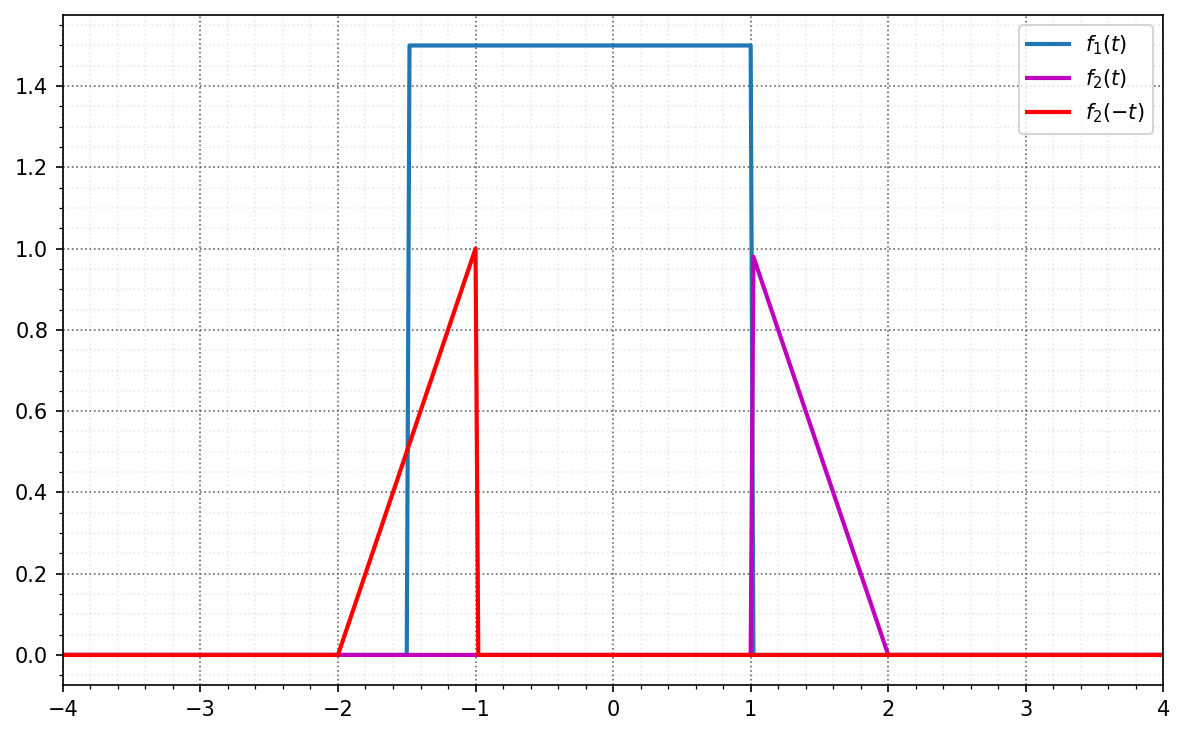

In [2]:
T = 6    # the time range we are interested in
t = np.arange(-T, T, 1/50)  # the time samples

f1 = lambda t: 1.5 * (t < 1) * (t > -1.5)  
f2 = lambda t: (t < 2) * (t > 1) * (2-t)  

t0 = np.arange(-3,4, 0.5) # set of values for which we wil compute output 

fig = plt.figure(1,figsize=(8,5))
plt.plot(t, f1(t), linewidth=2, label=r'$f_1(t)$')
plt.plot(t, f2(t), 'm-', linewidth=2, label=r'$f_2(t)$')
plt.plot(t, f2(-t), 'r-', linewidth=2, label=r'$f_2(-t)$')
nicegrid()
plt.xlim([-4, 4])
plt.legend(fontsize=10)
plt.show()

In [10]:
def showConvolution(t0, f1, f2):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)

    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear()
    plt.subplot(211)
    plt.tight_layout() 
    plt.gca().set_ymargin(0.1) 
    plt.plot(t, f1(t), linewidth=2,label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), 'm',linewidth=2, label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//') # il
    plt.plot(t, prod(t), 'r-', linewidth=2,label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$') # il
    plt.xlim([-6, 4])
    plt.legend(fontsize=10) 
    if t0 < 0:
        plt.text(-5, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white')) # il
    else:
        plt.text(3, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white')) # il
    
    # plot the convolution curve
    plt.subplot(212)
    bbox=plt.gca().get_position()
    offset=-.03
    plt.gca().set_position([bbox.x0, bbox.y0 - 2.5*offset, bbox.x1-bbox.x0, bbox.y1 - 4*bbox.y0])
    plt.gca().set_ymargin(0.5) 
    plt.plot(t, convolution, linewidth=2, label='$(f_1*f_2)(t_0)$')
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point
    plt.grid(True); plt.xlabel('$t_0$'); plt.ylabel('$(f_1*f_2)(t_0)$') 
    plt.legend(fontsize=10) 
    plt.xlim([-6, 4])
    #plt.draw() 

## $f_1$ convolved with $f_2$

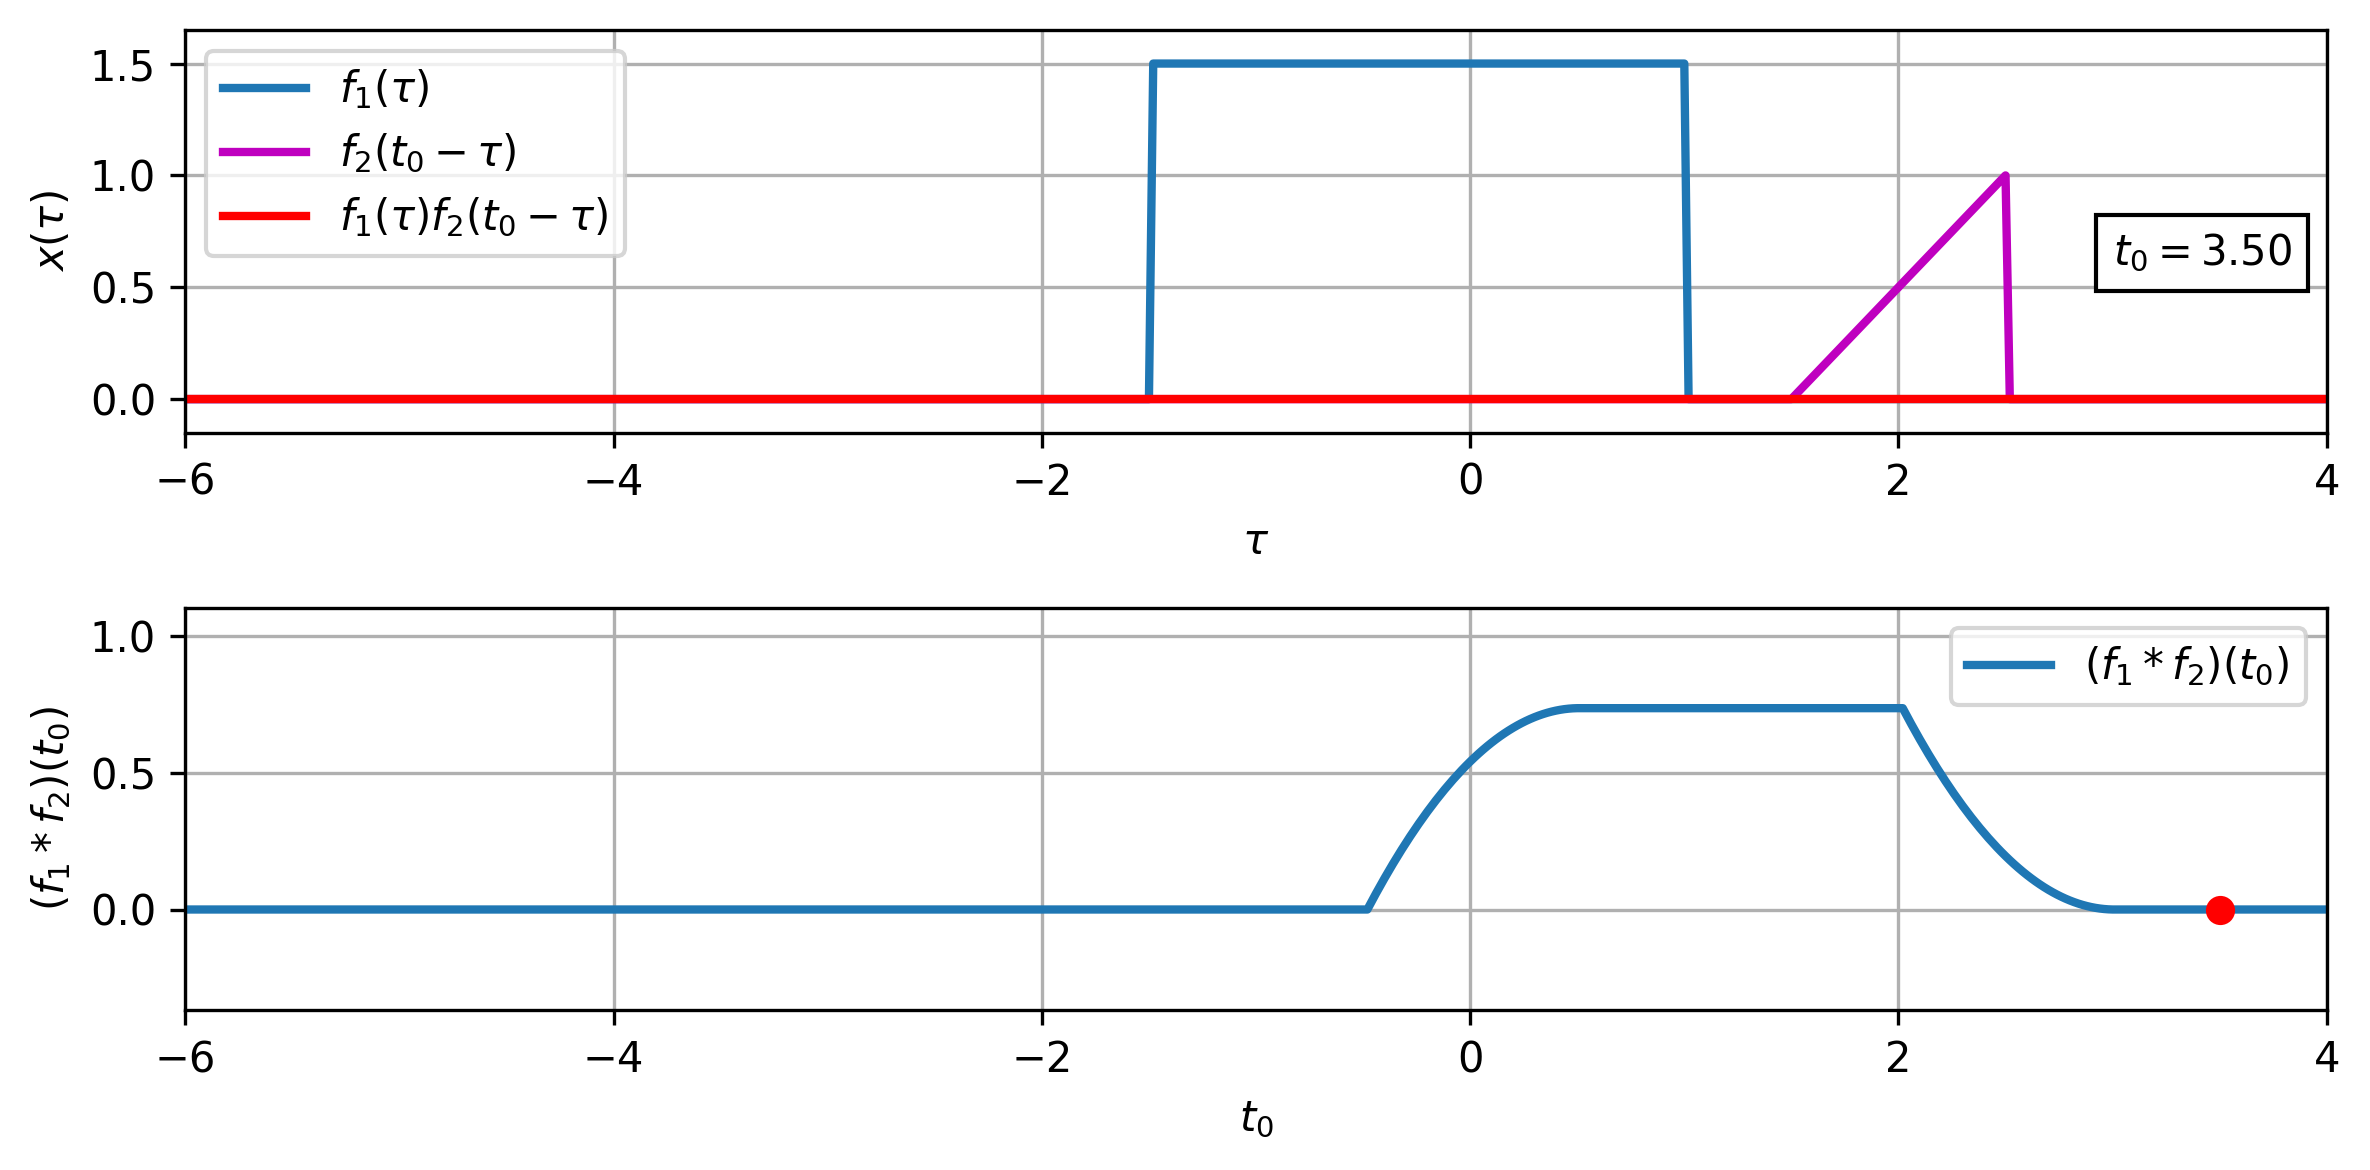

In [11]:
fig = plt.figure(2, figsize=(8, 4),dpi=300,constrained_layout = False)
anim = animation.FuncAnimation(fig, showConvolution, frames=t0, fargs=(f1,f2),interval=100)
temp1 = anim.save('figs/animation_topic5_1a_1.mp4', fps=0.25) # fps = frames per second
plt.show()

## $f_2$ convolved with $f_1$

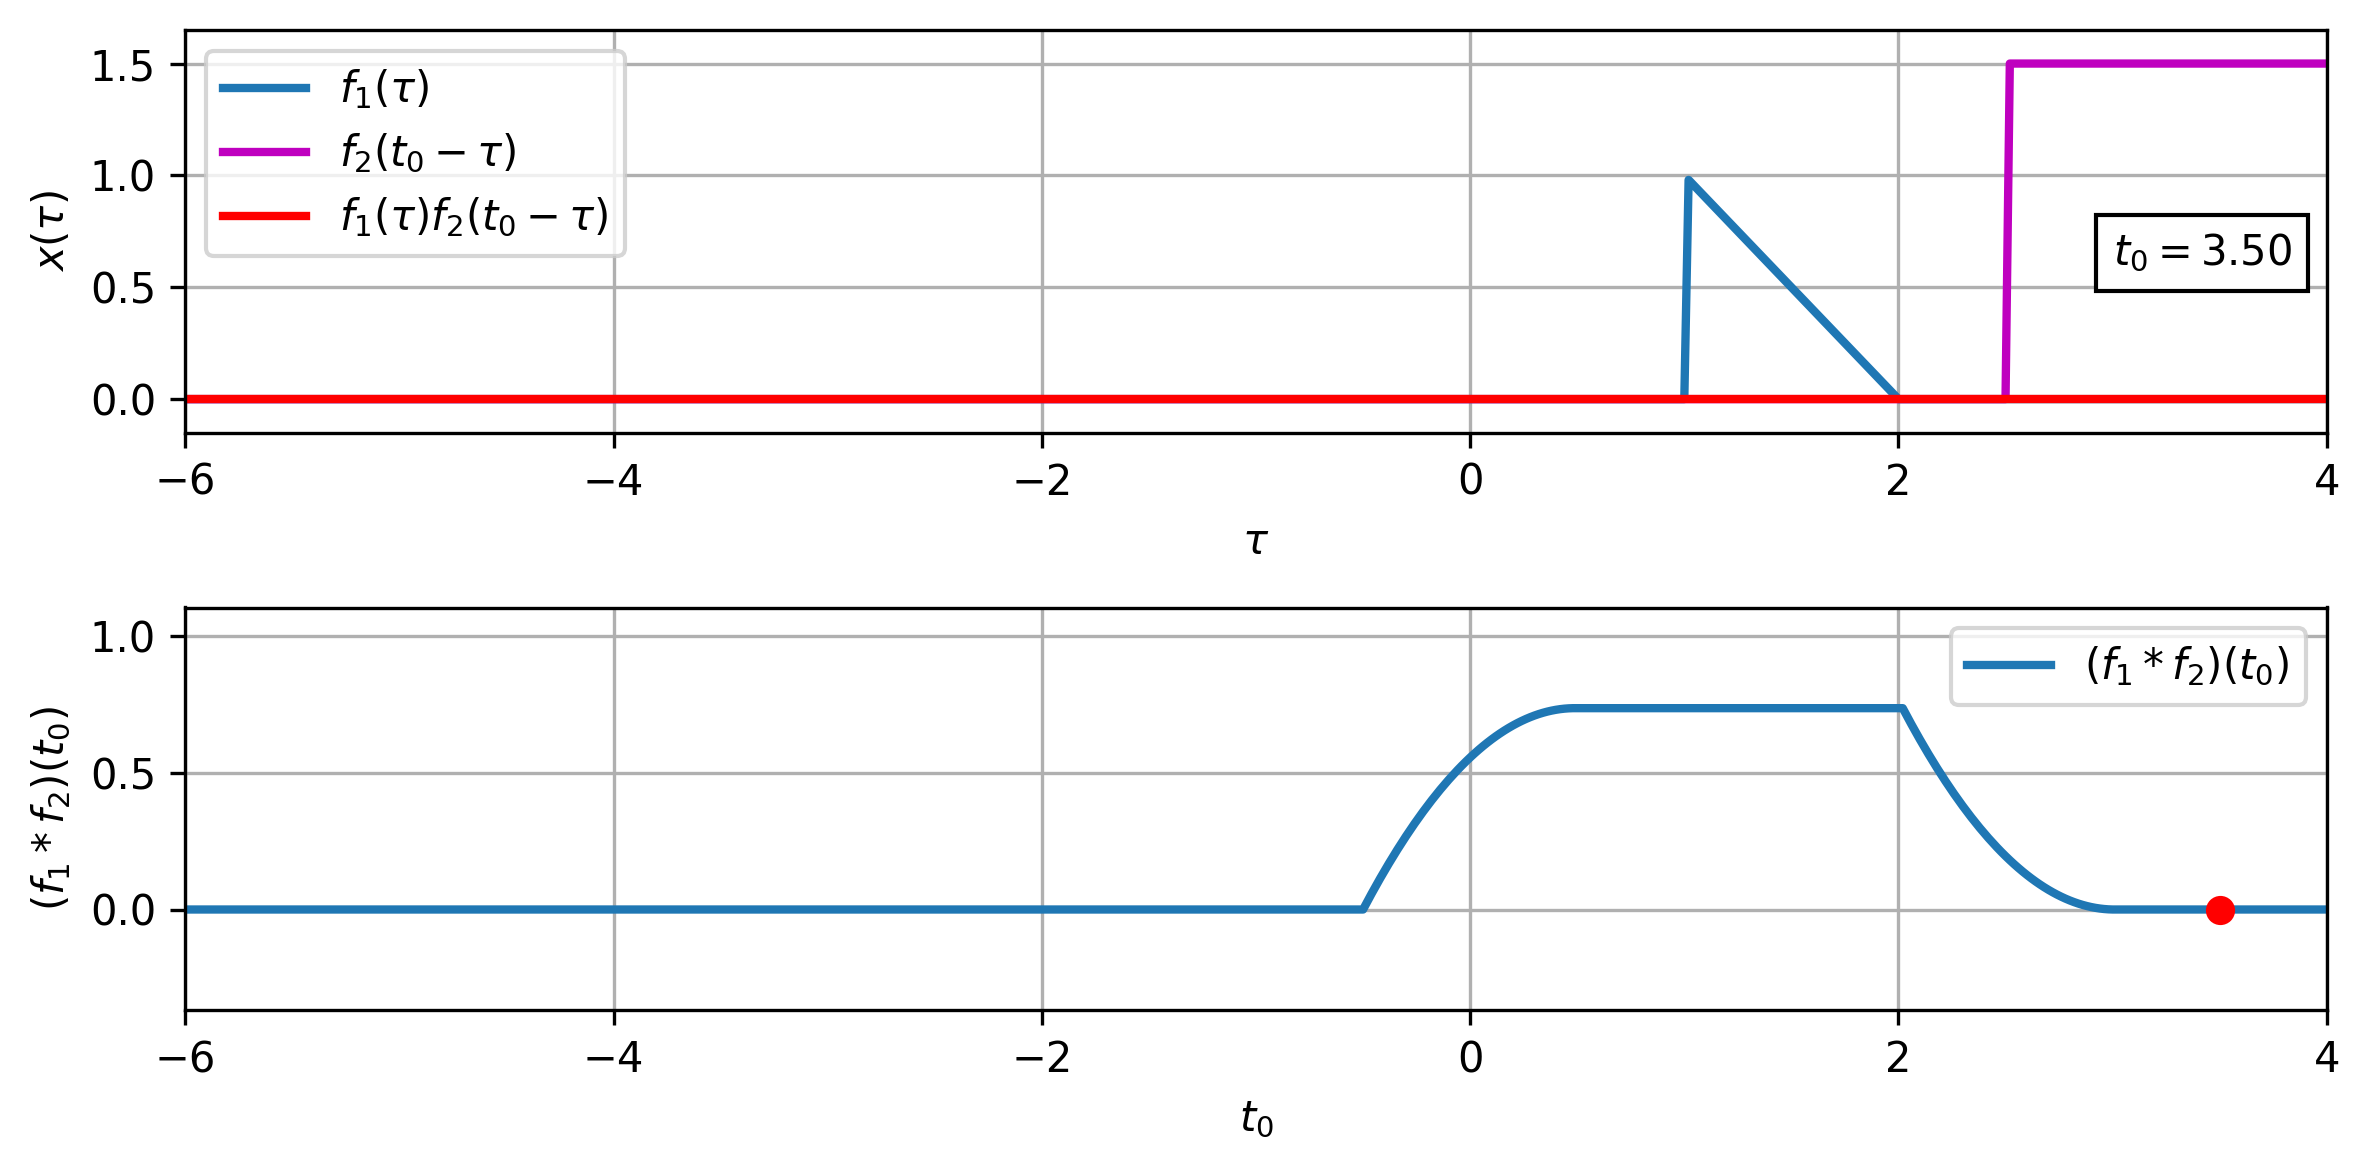

In [12]:
fig3 = plt.figure(3, figsize=(8, 4),dpi=300,constrained_layout = False)
anim = animation.FuncAnimation(fig3, showConvolution, frames=t0, fargs=(f2,f1),interval=100)
temp2 = anim.save('figs/animation_topic5_1a_2.mp4', fps=0.25) # fps = frames per second
plt.show()